<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Regress%C3%A3o/An%C3%A1lise_de_experimentos_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color ='green' size = 8> Planejamento de Experimentos 
</font>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


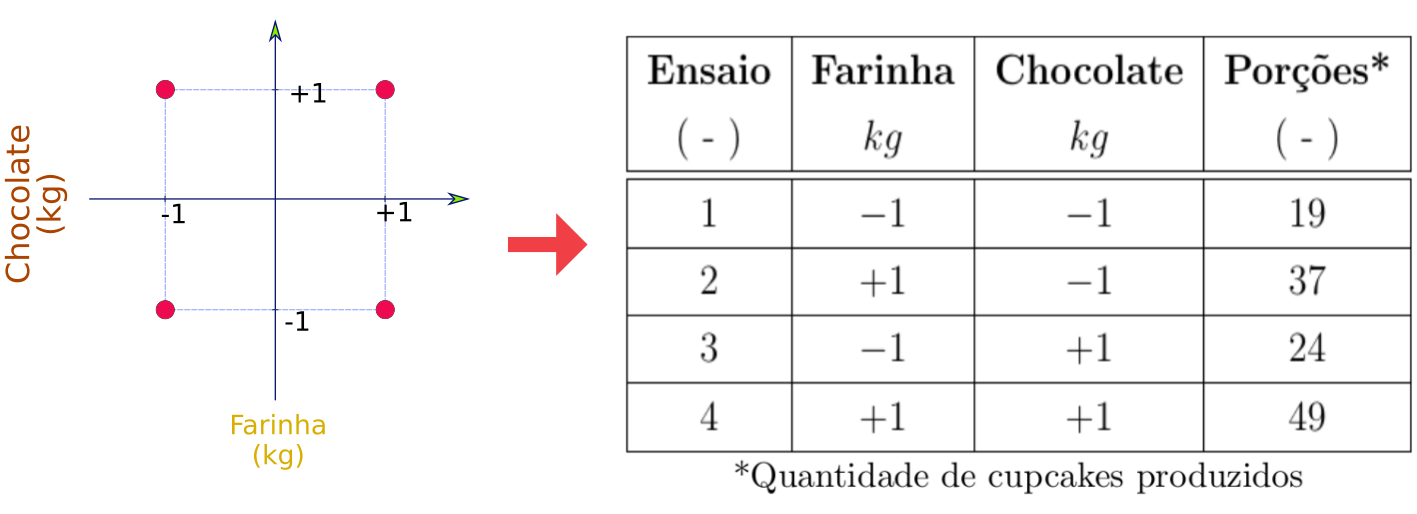

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [3]:
ensaios = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [4]:
!pip install pyDOE2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=dd7e4fd9a8ee461f1448d664badced6703bf9b51b5871b108b674aad8677fd5c
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built pyDOE2


In [5]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [6]:
ensaios = doe.ff2n(2)

In [7]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Inserindo o planejamento em um Data Frame

In [8]:
experimento = pd.DataFrame( data = ensaios, columns = ['Farinha','Chocolate'])

In [9]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [10]:
resultados = [19,37,24,49]
experimento['Resultados'] = resultados

In [11]:
experimento

,Farinha,Chocolate,Resultados
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [12]:
import seaborn as sns

In [13]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent_r')
sns.set_style('white')

# estilo -> white, dark, whitegrid, darkgrid, ticks


### Para a farinha

In [14]:
experimento

,Farinha,Chocolate,Resultados
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


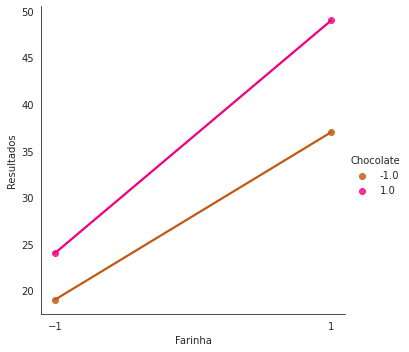

In [15]:
ax = sns.lmplot(data = experimento, x = 'Farinha',y ='Resultados', ci = None,hue = 'Chocolate')
ax.set(xticks = (-1,1))

### Para o chocolate

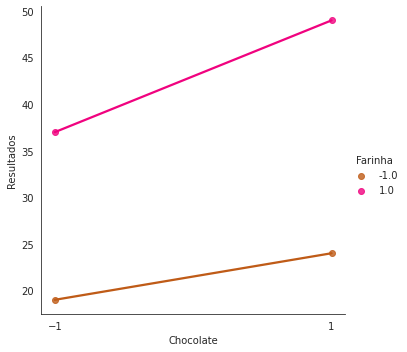

In [16]:
ax = sns.lmplot(data = experimento, x = 'Chocolate',y ='Resultados', ci = None, hue = 'Farinha')
ax.set(xticks = (-1,1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

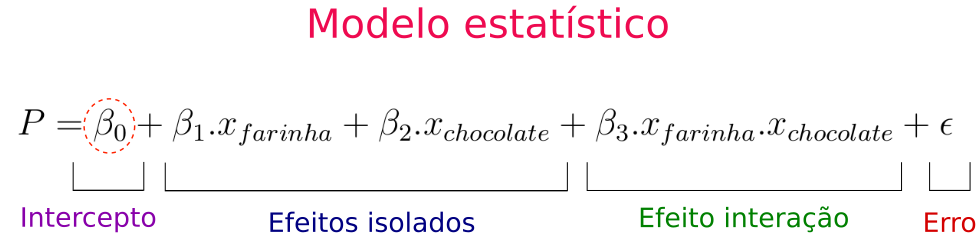

<hr>


### Bibliotecas  Stats Model


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### .

In [18]:
experimento.head(2)

,Farinha,Chocolate,Resultados
0,-1.0,-1.0,19
1,1.0,-1.0,37


In [19]:
modelo = smf.ols(data = experimento, formula = 'Resultados ~ Farinha + Chocolate + Farinha:Chocolate')

In [20]:
modelo_ajustado = modelo.fit()

In [21]:
print( modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Resultados   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 06 Jul 2022   Prob (F-statistic):                nan
Time:                        01:57:54   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: invalid value encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


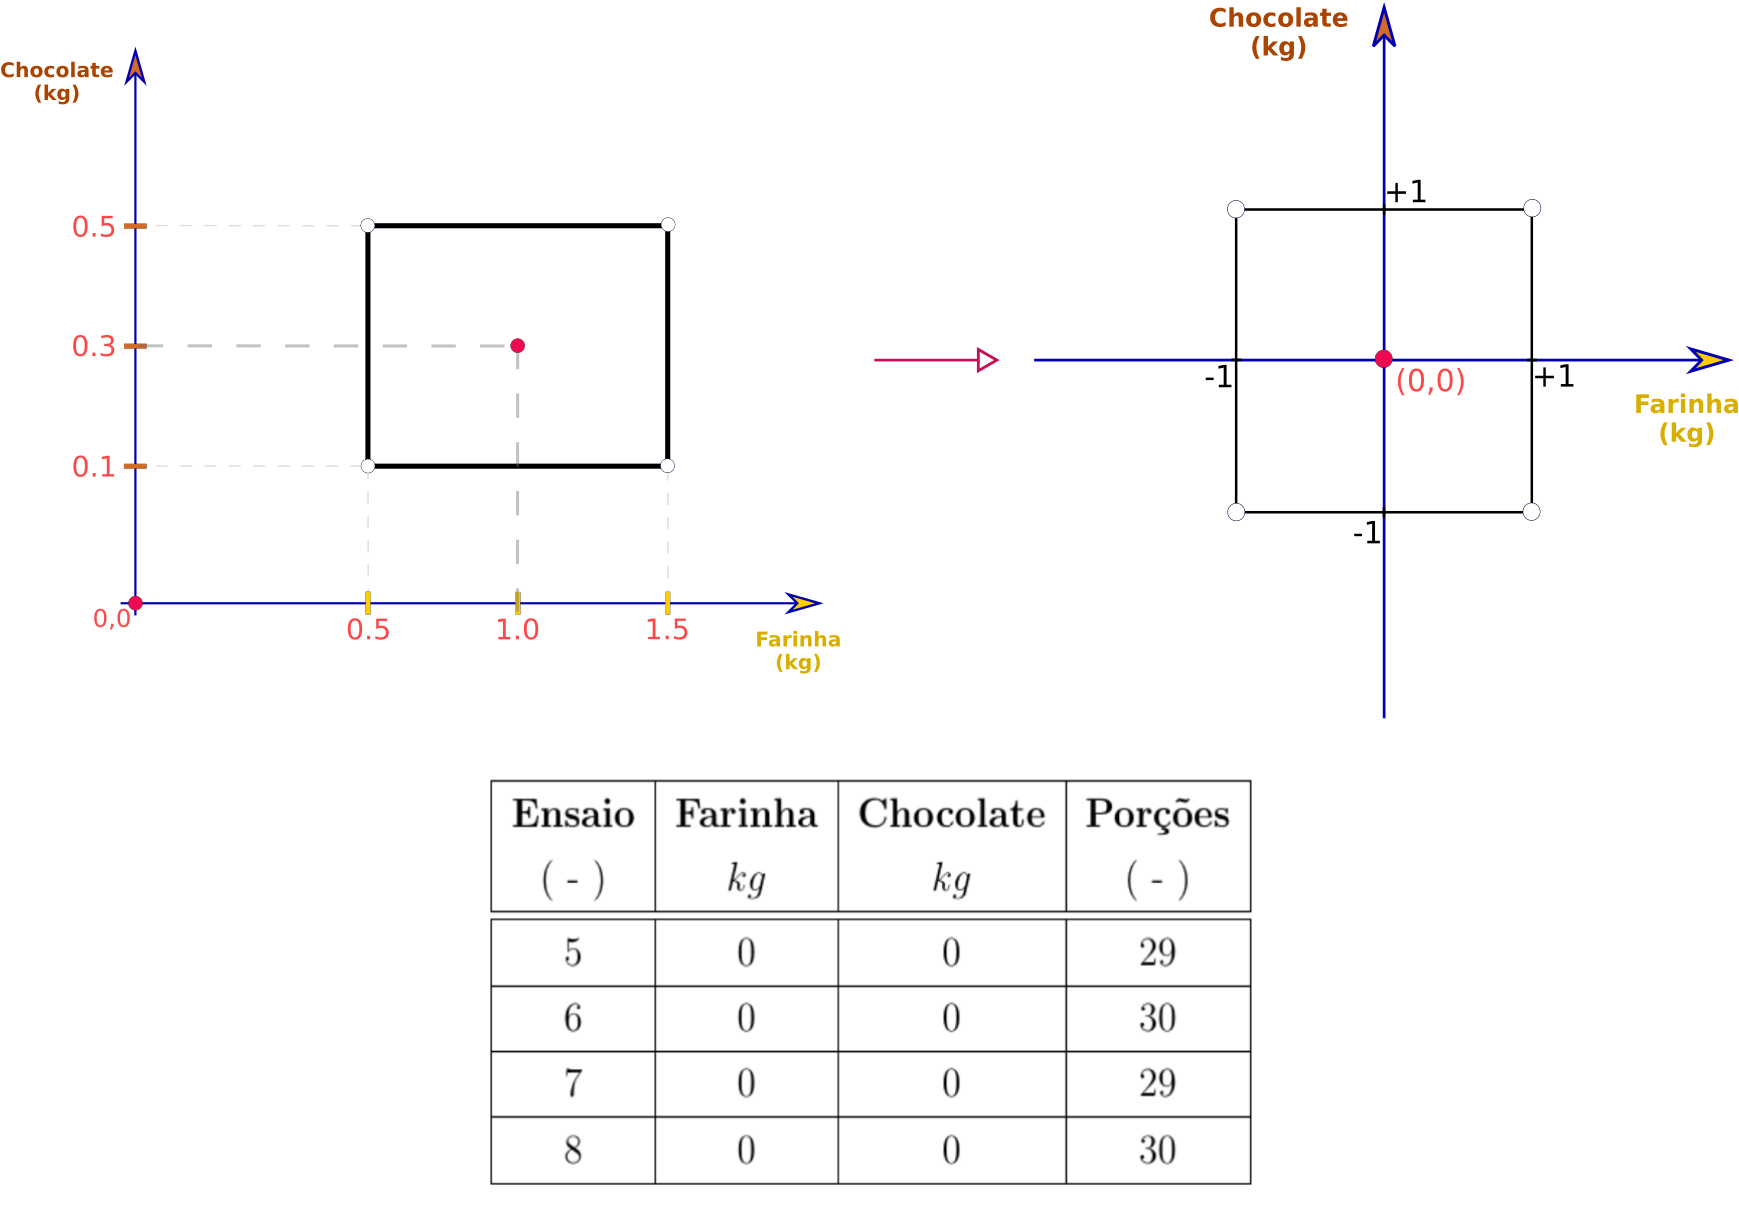

<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [22]:
experimento

,Farinha,Chocolate,Resultados
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


In [23]:
centro = np.array([[0,0,29],[0,0,30],[0,0,29],[0,0,30]])

In [24]:
centrodf = pd.DataFrame(data =  centro, columns = ['Farinha', 'Chocolate', 'Resultados'], index = [4,5,6,7])
centrodf

,Farinha,Chocolate,Resultados
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [25]:
experimento = experimento.append(centrodf)

### .

In [26]:
experimento

,Farinha,Chocolate,Resultados
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [27]:
modelo = smf.ols(data = experimento, formula = 'Resultados ~ Farinha + Chocolate + Farinha:Chocolate')

In [28]:
modelo_ajustado = modelo.fit()

In [29]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Resultados   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Wed, 06 Jul 2022   Prob (F-statistic):            0.00152
Time:                        01:57:54   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<p style='margin: 200px 200px;'>    


<hr>

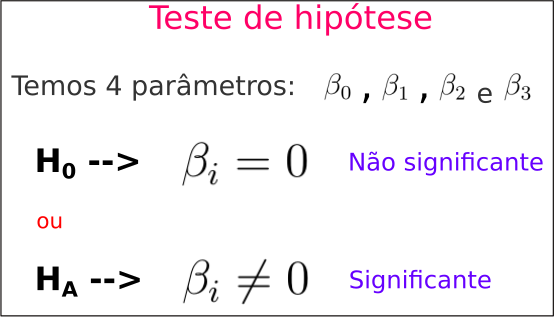



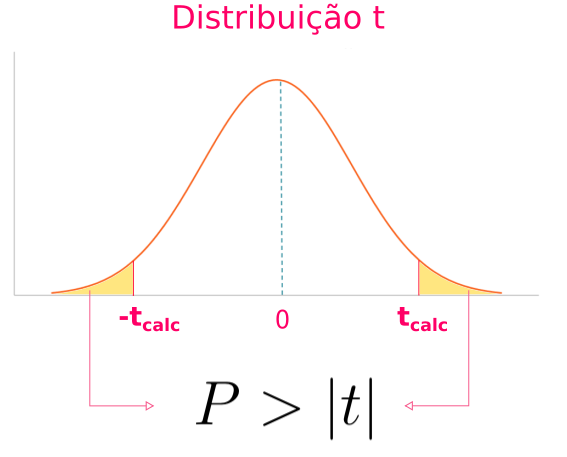


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





In [30]:
t_valores = modelo_ajustado.tvalues

In [31]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [32]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [33]:
from scipy import stats

### .


In [34]:
distribuicao = stats.t(df = 4)

In [35]:
distribuicao.ppf(q = 1-0.025)

2.7764451051977987

In [36]:
limite = [distribuicao.ppf(q = 1-0.025)]*len(nome)

In [37]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

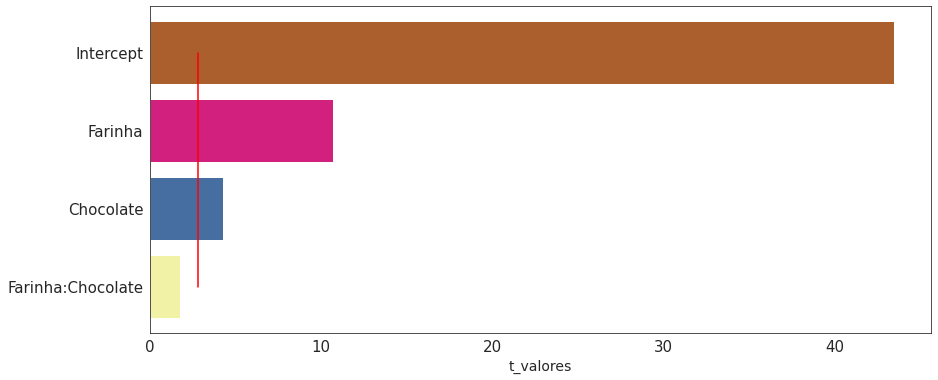

In [38]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(14,6)
pareto.tick_params(labelsize = 15)
pareto.set_xlabel('t_valores',fontsize = 14)
pareto.plot(limite,nome,'r')

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

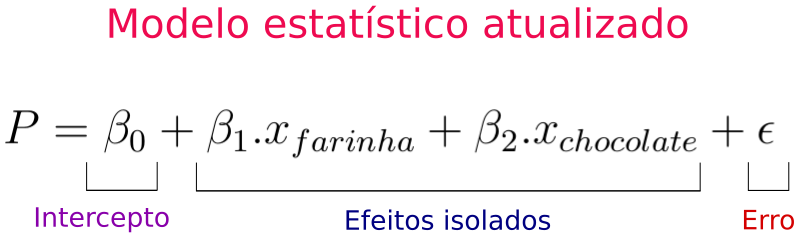

<p style='margin: 30px 30px;'> 

<hr>

In [39]:
modelo2 = smf.ols(data = experimento, formula = 'Resultados ~ Farinha + Chocolate ')

In [40]:
modelo2_ajustado = modelo2.fit()

In [41]:
print(modelo2_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Resultados   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           0.000571
Time:                        01:57:55   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<hr>

# <font color = 'purple'> Preditos por Observados   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [42]:
observados = experimento['Resultados']
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Resultados, dtype: int64

In [43]:
preditos = modelo2_ajustado.predict()

In [44]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [45]:
import matplotlib.pyplot as plt


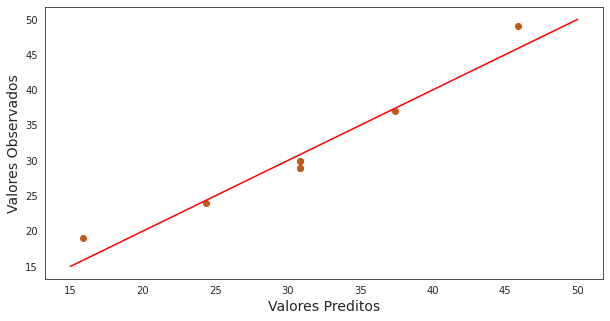

In [46]:
plt.figure(figsize = (10,5))
plt.xlabel('Valores Preditos', fontsize = 14)
plt.ylabel('Valores Observados', fontsize = 14)

#Linha guia
x = np.linspace(15, 50,10)
plt.plot(x, x , 'r')

# Plot dos dados
plt.scatter(preditos, observados)

In [47]:
print(modelo2_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Resultados   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           0.000571
Time:                        01:57:55   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [48]:
parametros = modelo2_ajustado.params

In [49]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [64]:
def modelo_receita(x_f, x_c):

  #Limites
  limite_normalizado = [-1, 1]
  limite_farinha = [0.5, 1.5]
  limite_chocolate = [0.1,0.5]

  #Converter valores
  x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
  x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)

  porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido + parametros['Chocolate']*x_c_convertido

  return round(porcoes,0)


In [65]:
modelo_receita(0.5,0.1)

16.0

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 150px 150px;'>

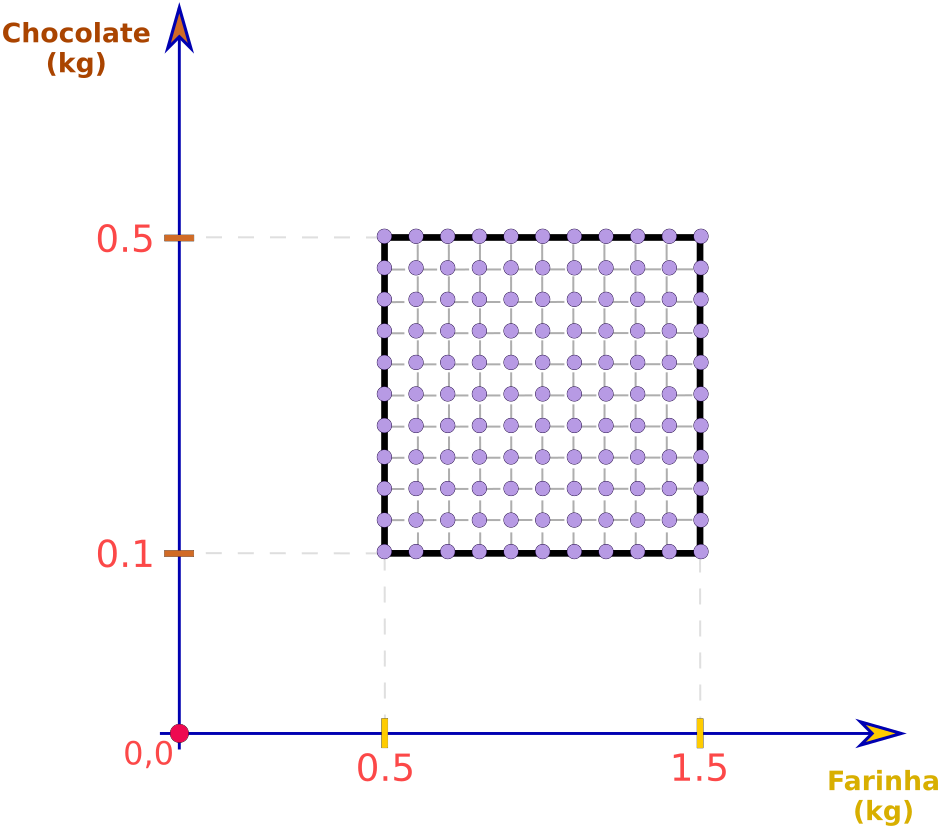



<p style='margin: 30px 30px;'>

In [69]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [70]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [71]:
pontos = []

for cont1 in x_farinha:
  temp = []
  for cont2 in x_chocolate:
    temp.append(modelo_receita(cont1, cont2))
  pontos.append(temp)

In [72]:
pontos

[[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 22.0, 23.0, 24.0],
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0],
 [21.0, 22.0, 23.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0],
 [23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0],
 [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0],
 [28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 33.0, 34.0, 35.0, 36.0],
 [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
 [33.0, 34.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0],
 [35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 43.0],
 [37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0]]

### .

### Construindo a superfície de resposta

In [73]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 7 text.Text objects>

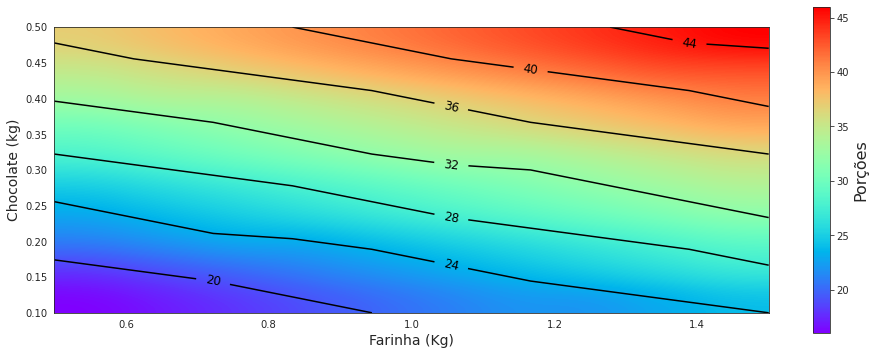

In [84]:
#base

plt.figure(figsize = (16,6))
plt.xlabel('Farinha (Kg)', fontsize = 14)
plt.ylabel('Chocolate (kg)', fontsize = 14)
# Mapa de cores
mapa_cor = plt.imshow(pontos, origin = 'lower', cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5, 1.5,0.1,0.5))

#Barra de cor
plt.colorbar().set_label('Porções', fontsize = 16)

#Linha de guia
linhas = plt.contour(x_farinha, x_chocolate, pontos,colors = 'k', linewidths = 1.5 )

plt.clabel(linhas, inline = True,fmt='%1.0f', fontsize = 12, inline_spacing = 10)